In [16]:
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt


def createFileList(myDir):
    dataframe = pd.DataFrame(columns=['label', 'img'])
    for mroot, mdirs, mfiles in os.walk(myDir):
        for dir in mdirs:
            label = dir
            print(label)
            for root, dirs, files in os.walk(mroot+'\\'+dir):
                for file in files:
                    img = cv2.imread(root+'\\'+file)
                    #traitement de l'image
                    
                    dataframe = dataframe.append({'label': label, 'img': img}, ignore_index=True)
    return dataframe
        

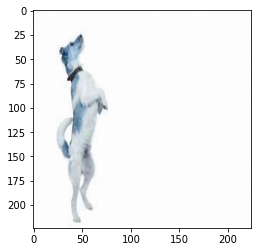

In [3]:
#img = cv2.imread('C:\\Users\\Eliaz\\Documents\\GitHub\\Animal-identification-NN\\dataset\\raw-img\\dog\\OIP-eXkl3wu2uTQUW2gw9KqG2wHaE8.jpeg')
#img = cv2.resize(img, (224, 224))
#plt.imshow(img)

In [18]:
dfFiles = createFileList('C:\\Users\\Eliaz\\Documents\\GitHub\\Animal-identification-NN\\dataset\\raw-img')
#print(list)

butterfly
cat
chicken
cow
dog
elephant
horse
sheep
spider
squirrel


In [28]:
print(dfFiles.shape)
print(dfFiles['label'].value_counts())
print(dfFiles['img'].apply(lambda x: x.shape).unique().shape)
# taille_array = ()
# for i in dfFiles['img']:
    

(26179, 2)
dog          4863
spider       4821
chicken      3098
horse        2623
butterfly    2112
cow          1866
squirrel     1862
sheep        1820
cat          1668
elephant     1446
Name: label, dtype: int64
(1002,)


In [ ]:

#traitement